In [352]:
import pandas as pd
import numpy as np
import seaborn as sns



In [353]:
pg = pd.read_csv(r'C:\Users\User\pinguins2.csv', sep= ';', na_values=['NA', 'NaN', 'null'])

In [354]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [355]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Espece                344 non-null    object 
 1   Ilha                  344 non-null    object 
 2   largura do bico       342 non-null    float64
 3   profundidade do bico  342 non-null    float64
 4   tamanho_da_asa        342 non-null    float64
 5   massa corporal        342 non-null    float64
 6   sexo                  333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [356]:
pg.isnull().value_counts()

Espece  Ilha   largura do bico  profundidade do bico  tamanho_da_asa  massa corporal  sexo 
False   False  False            False                 False           False           False    333
                                                                                      True       9
               True             True                  True            True            True       2
Name: count, dtype: int64

**- Vamos definir os seguintes problemas:**
- 1.Quais pinguins não têm anotações? 
- 2.Quais ilhas a maioria dos pinguins está vindo? 
- 3.Quais as espécies que a ONG mais possui? 
- 4.Existe alguma relação entre as medidas do pinguim e a sua espécie? 
- 5.Existe alguma relação entre as medidas do pinguim e seu sexo para cada uma das três espécies?  

# 1. Quais pinguins não têm anotações? 

In [357]:

pg.isna().value_counts()


Espece  Ilha   largura do bico  profundidade do bico  tamanho_da_asa  massa corporal  sexo 
False   False  False            False                 False           False           False    333
                                                                                      True       9
               True             True                  True            True            True       2
Name: count, dtype: int64

<Axes: ylabel='Count'>

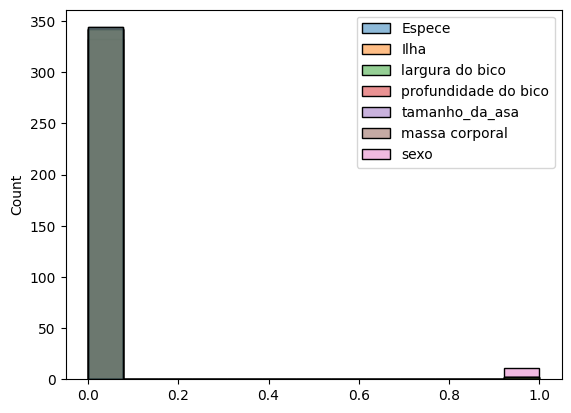

In [358]:
valores_faltantes = pg.isnull()
sns.histplot(
    valores_faltantes, 
)

# 2. Quais ilhas a maioria dos pinguins está vindo? 

In [359]:
pg.Espece.value_counts()

Espece
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

# 3.Quais as espécies que a ONG mais possui? 

In [360]:
pg.Ilha.value_counts()

Ilha
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

# 4.Existe alguma relação entre as medidas do pinguim e a sua espécie?

In [361]:
pg.columns

Index(['Espece', 'Ilha', 'largura do bico', 'profundidade do bico',
       'tamanho_da_asa', 'massa corporal', 'sexo'],
      dtype='object')

In [362]:
colunas_numericas = ['largura do bico', 'profundidade do bico', 'tamanho_da_asa', 'massa corporal']

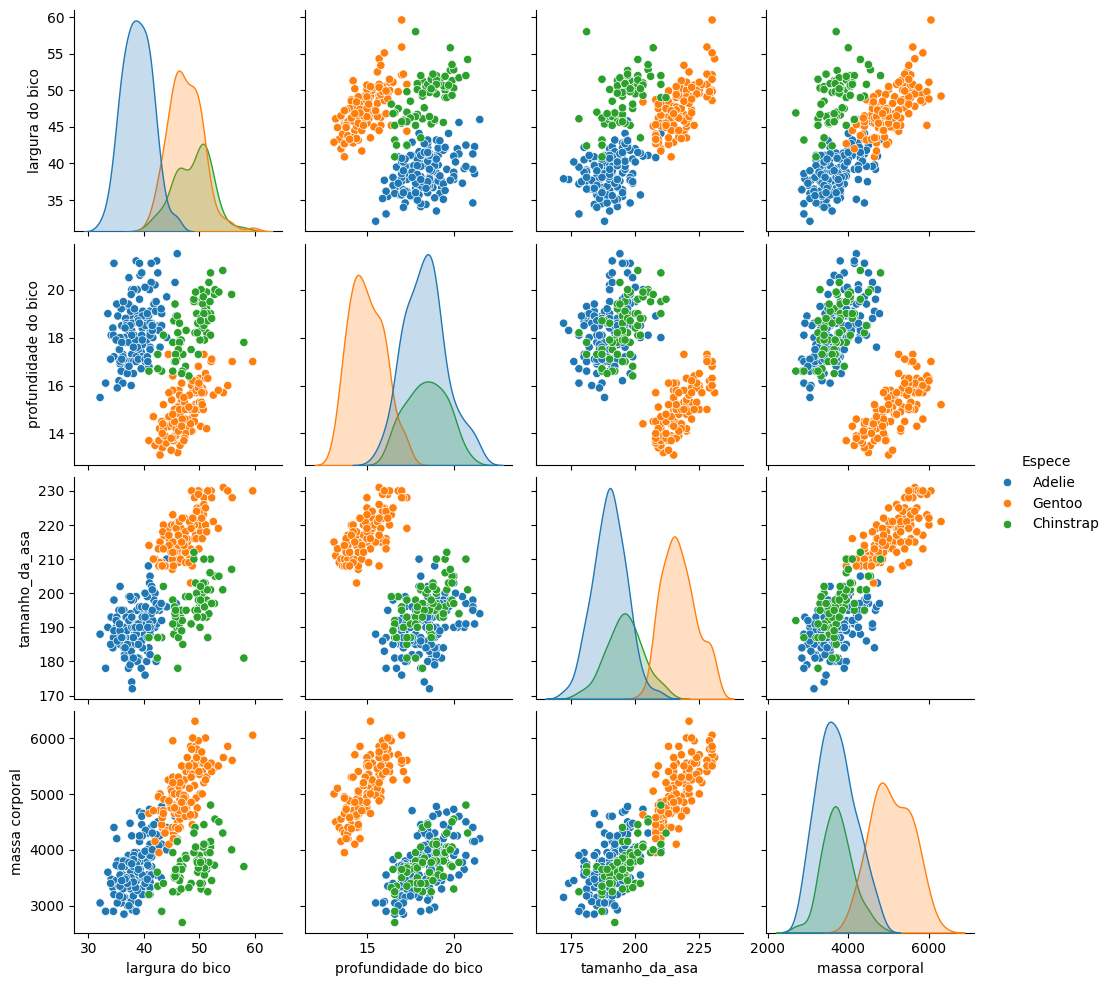

In [363]:
sns.pairplot(pg, hue='Espece')

# 5.Existe alguma relação entre as medidas do pinguim e seu sexo para cada uma das três espécies?

In [364]:
pg['sexo'].isna().value_counts()

sexo
False    333
True      11
Name: count, dtype: int64

In [365]:
pg.dropna(subset=['sexo'], inplace= True)

In [366]:
pg['sexo'].isna().value_counts()

sexo
False    333
Name: count, dtype: int64

In [367]:
pd.get_dummies(pg.sexo)

,female,male
0,False,True
1,True,False
2,True,False
4,True,False
5,False,True
...,...,...
339,False,True
340,True,False
341,False,True
342,False,True


In [368]:
sexo = pd.get_dummies(pg.sexo)

In [369]:
pg[['female', 'male']] = sexo

In [370]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,sexo,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,False,True


In [371]:
pg.drop(['sexo'], axis=1, inplace=True)

In [372]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,False,True


In [373]:
pg.drop(['male'], axis= 1, inplace= True)

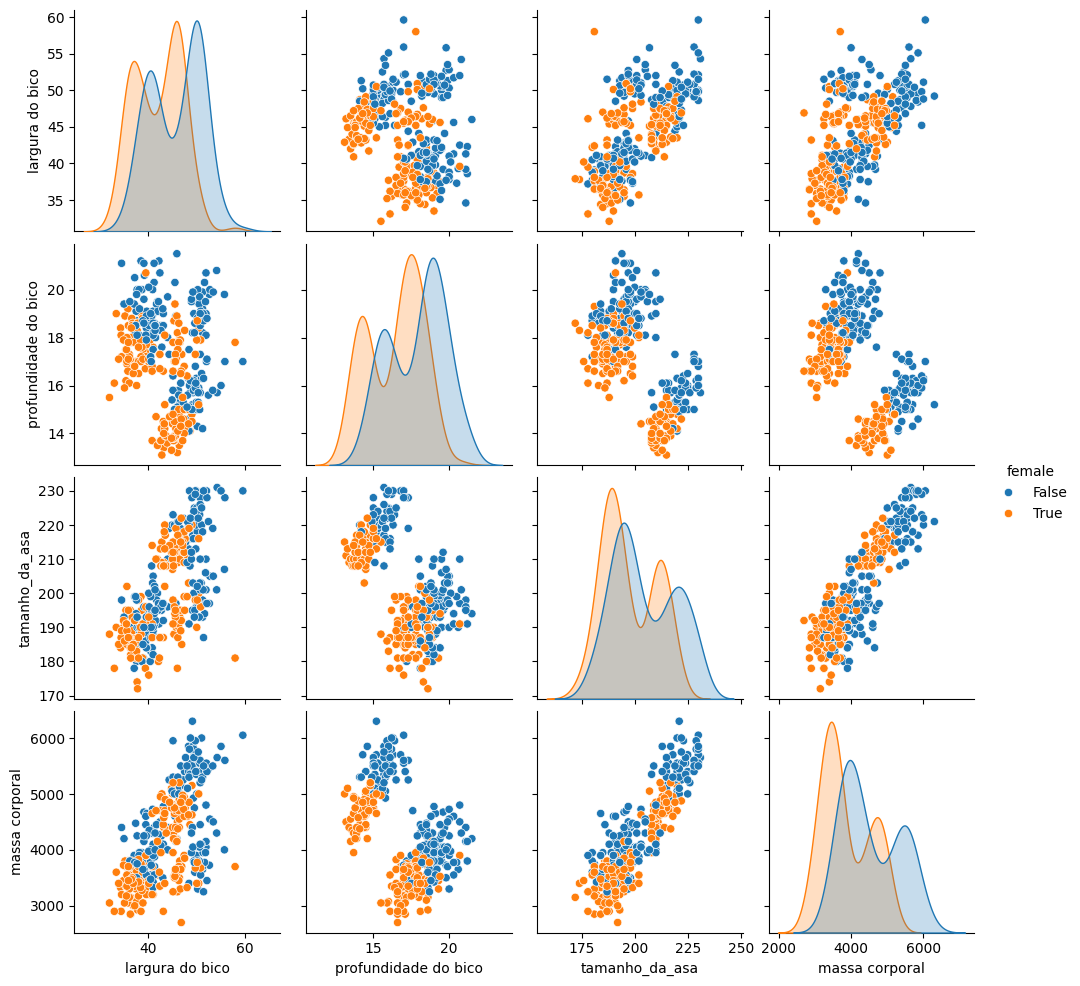

In [374]:
sns.pairplot(pg, hue='female')

# Modelo para determinar a espécie utilizando as medidas dos pinguins (Usando SVM)

In [375]:
from sklearn.model_selection import train_test_split

In [376]:
X_columns = ['largura do bico', 'profundidade do bico', 'tamanho_da_asa', 'massa corporal']
y_columns = ['Espece']
X = pg[X_columns]
y = pg[y_columns]

In [377]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [378]:
from sklearn.svm import SVC

In [379]:
model = SVC()

In [380]:
y_train = y_train.values.ravel()  
model.fit(X_train, y_train)

SVC()

In [381]:
preds = model.predict(x_test)

In [382]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.76
